## Imports

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import custom modules
import data_utils
import analysis
import plotting

%matplotlib inline

## Configuration

In [6]:
DATA_DIR = "data"
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11

## 1. Load Data

In [7]:
# Load metadata
metadata = data_utils.load_metadata(os.path.join(DATA_DIR, 'metadata.pkl'))

langNames = metadata['langNames']
langnameGroup = metadata['langnameGroup']
appearance_dict = metadata['appearance_dict']

print(f"Languages: {len(langNames)}")
print(f"Groups: {len(set(langnameGroup.values()))}")

Loaded metadata from data/metadata.pkl
Languages: 186
Groups: 11


In [8]:
# Load analysis results
results = analysis.load_analysis_results(DATA_DIR)

all_langs_position2num = results['all_langs_position2num']
all_langs_position2sizes = results['all_langs_position2sizes']
all_langs_average_sizes = results['all_langs_average_sizes']
filtered_position2num = results['filtered_position2num']
filtered_position2sizes = results['filtered_position2sizes']
lang2MAL = results['lang2MAL']

print(f"Languages with results: {len(lang2MAL)}")

Loaded all_langs_position2num.pkl
Loaded all_langs_position2sizes.pkl
Loaded all_langs_average_sizes.pkl
Loaded filtered_position2num.pkl
Loaded filtered_position2sizes.pkl
Loaded lang2MAL.pkl
All analysis results loaded from data/
Languages with results: 186


## 2. Explore MAL Data

In [9]:
# Show sample MAL data
sample_langs = list(lang2MAL.keys())[:5]
print("Sample MAL data:")
for lang in sample_langs:
    lang_name = langNames.get(lang, lang)
    mal_values = lang2MAL[lang]
    print(f"  {lang_name} ({lang}): {mal_values}")

Sample MAL data:
  Abaza (abq): {1: 1.8055555555555556}
  Abkhaz (ab): {1: 1.9312320916905443, 2: 1.5}
  Afrikaans (af): {1: 9.94249022892239, 2: 6.60904255319149, 3: 5.2459546925566345, 4: 3.975}
  Akkadian (akk): {1: 1.5805739514348787, 2: 3.0681818181818183}
  Akuntsu (aqz): {1: 1.1975308641975309}


In [11]:
# Statistics on MAL coverage
max_n_per_lang = {lang: max(mal.keys()) for lang, mal in lang2MAL.items() if mal}
print(f"Maximum n value per language:")
print(pd.Series(max_n_per_lang).describe())
print(f"\nLanguages with MAL data: {len(max_n_per_lang)}")
print(f"Languages without MAL data: {len(lang2MAL) - len(max_n_per_lang)}")

Maximum n value per language:
count    175.000000
mean       3.274286
std        1.763021
min        1.000000
25%        2.000000
50%        3.000000
75%        4.500000
max        9.000000
dtype: float64

Languages with MAL data: 175
Languages without MAL data: 11


## 3. Plot MAL Curves (n=2)

Number of languages with data from n=1 to 2: 143
Mean values: [4.86809265462582, 3.7118356308140923]


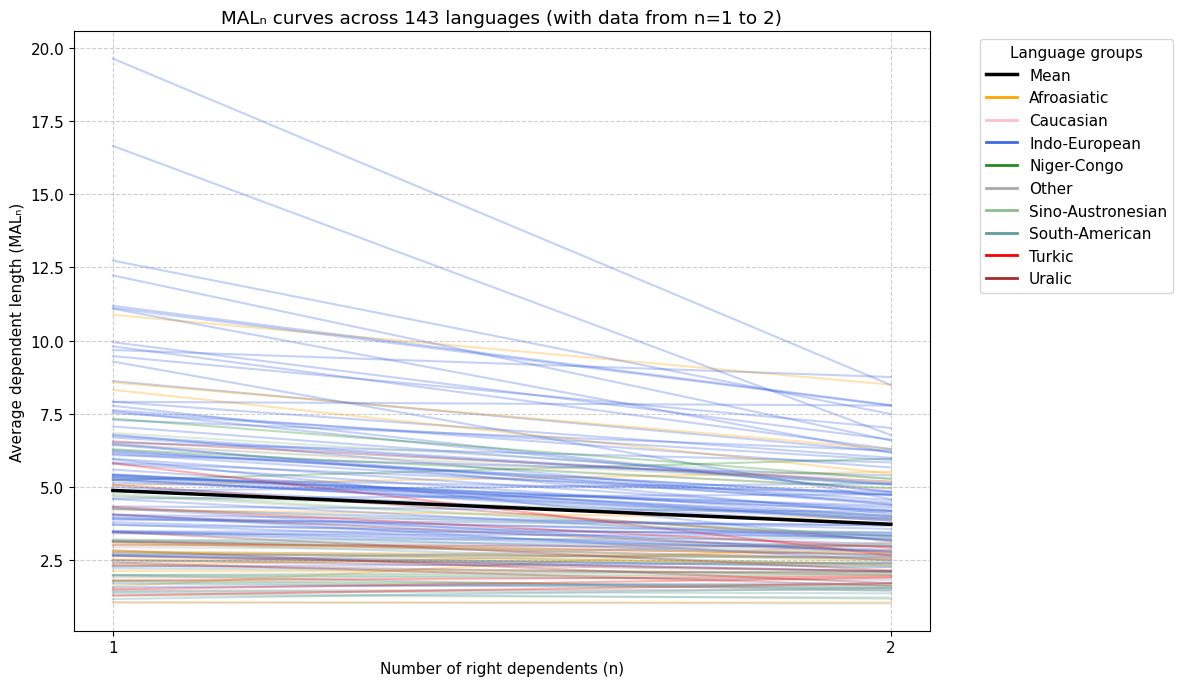

In [12]:
plotting.plot_mal_curves_with_groups(
    lang2MAL,
    langNames,
    langnameGroup,
    appearance_dict,
    n_required=2,
    figsize=(12, 7)
)

## 4. Plot MAL Curves (n=3)

Number of languages with data from n=1 to 3: 108
Mean values: [5.238027212744209, 4.02452263861558, 3.6731331655036117]


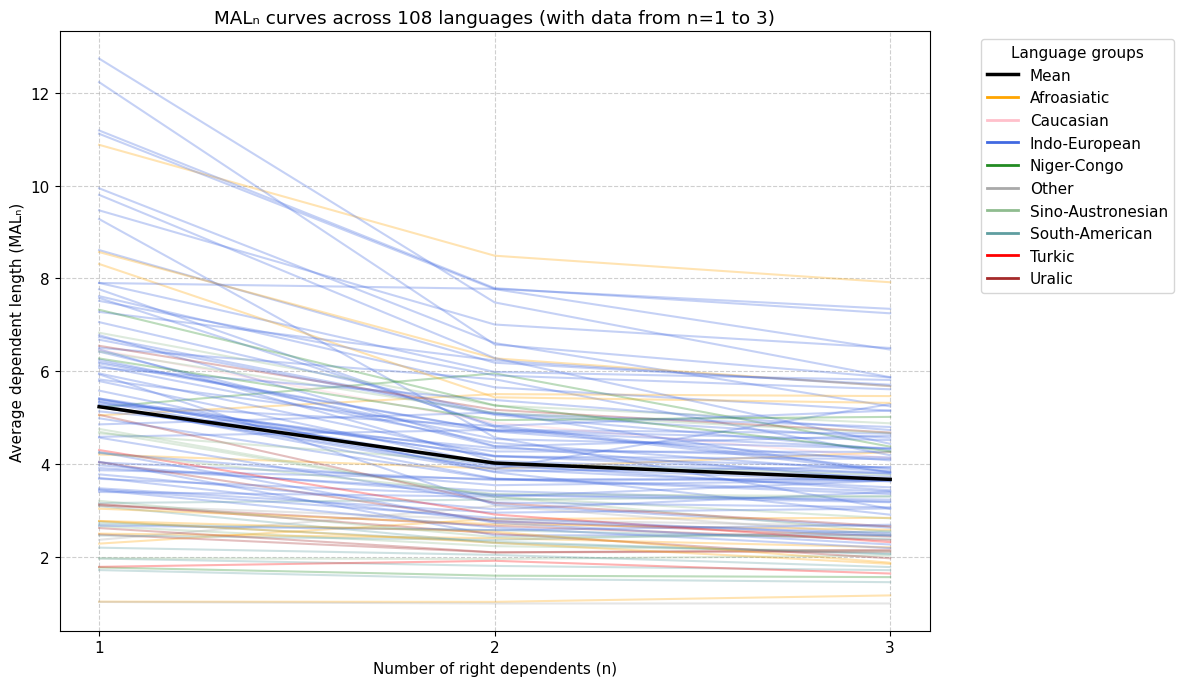

In [13]:
plotting.plot_mal_curves_with_groups(
    lang2MAL,
    langNames,
    langnameGroup,
    appearance_dict,
    n_required=3,
    figsize=(12, 7)
)

## 5. Plot MAL Curves (n=5)

Number of languages with data from n=1 to 5: 44
Mean values: [5.919561492748965, 4.540794886157959, 4.181497081925998, 4.076432741551219, 4.095980489913453]


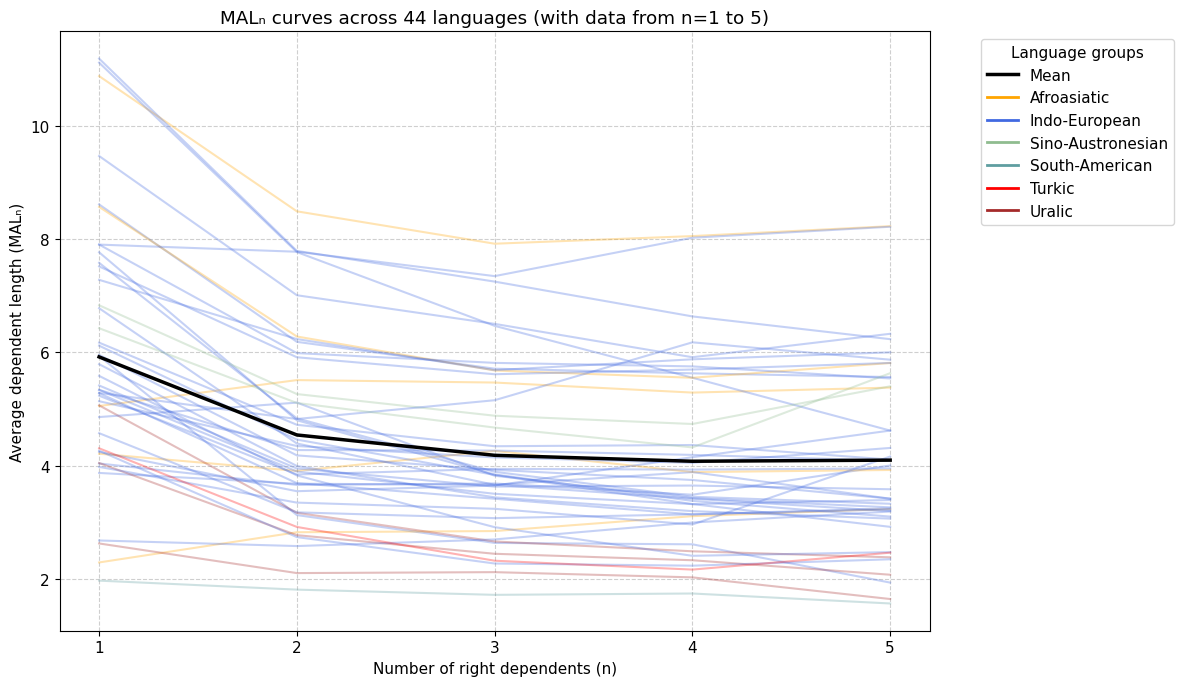

In [14]:
plotting.plot_mal_curves_with_groups(
    lang2MAL,
    langNames,
    langnameGroup,
    appearance_dict,
    n_required=5,
    figsize=(12, 7)
)

## 6. Plot MAL Heatmap

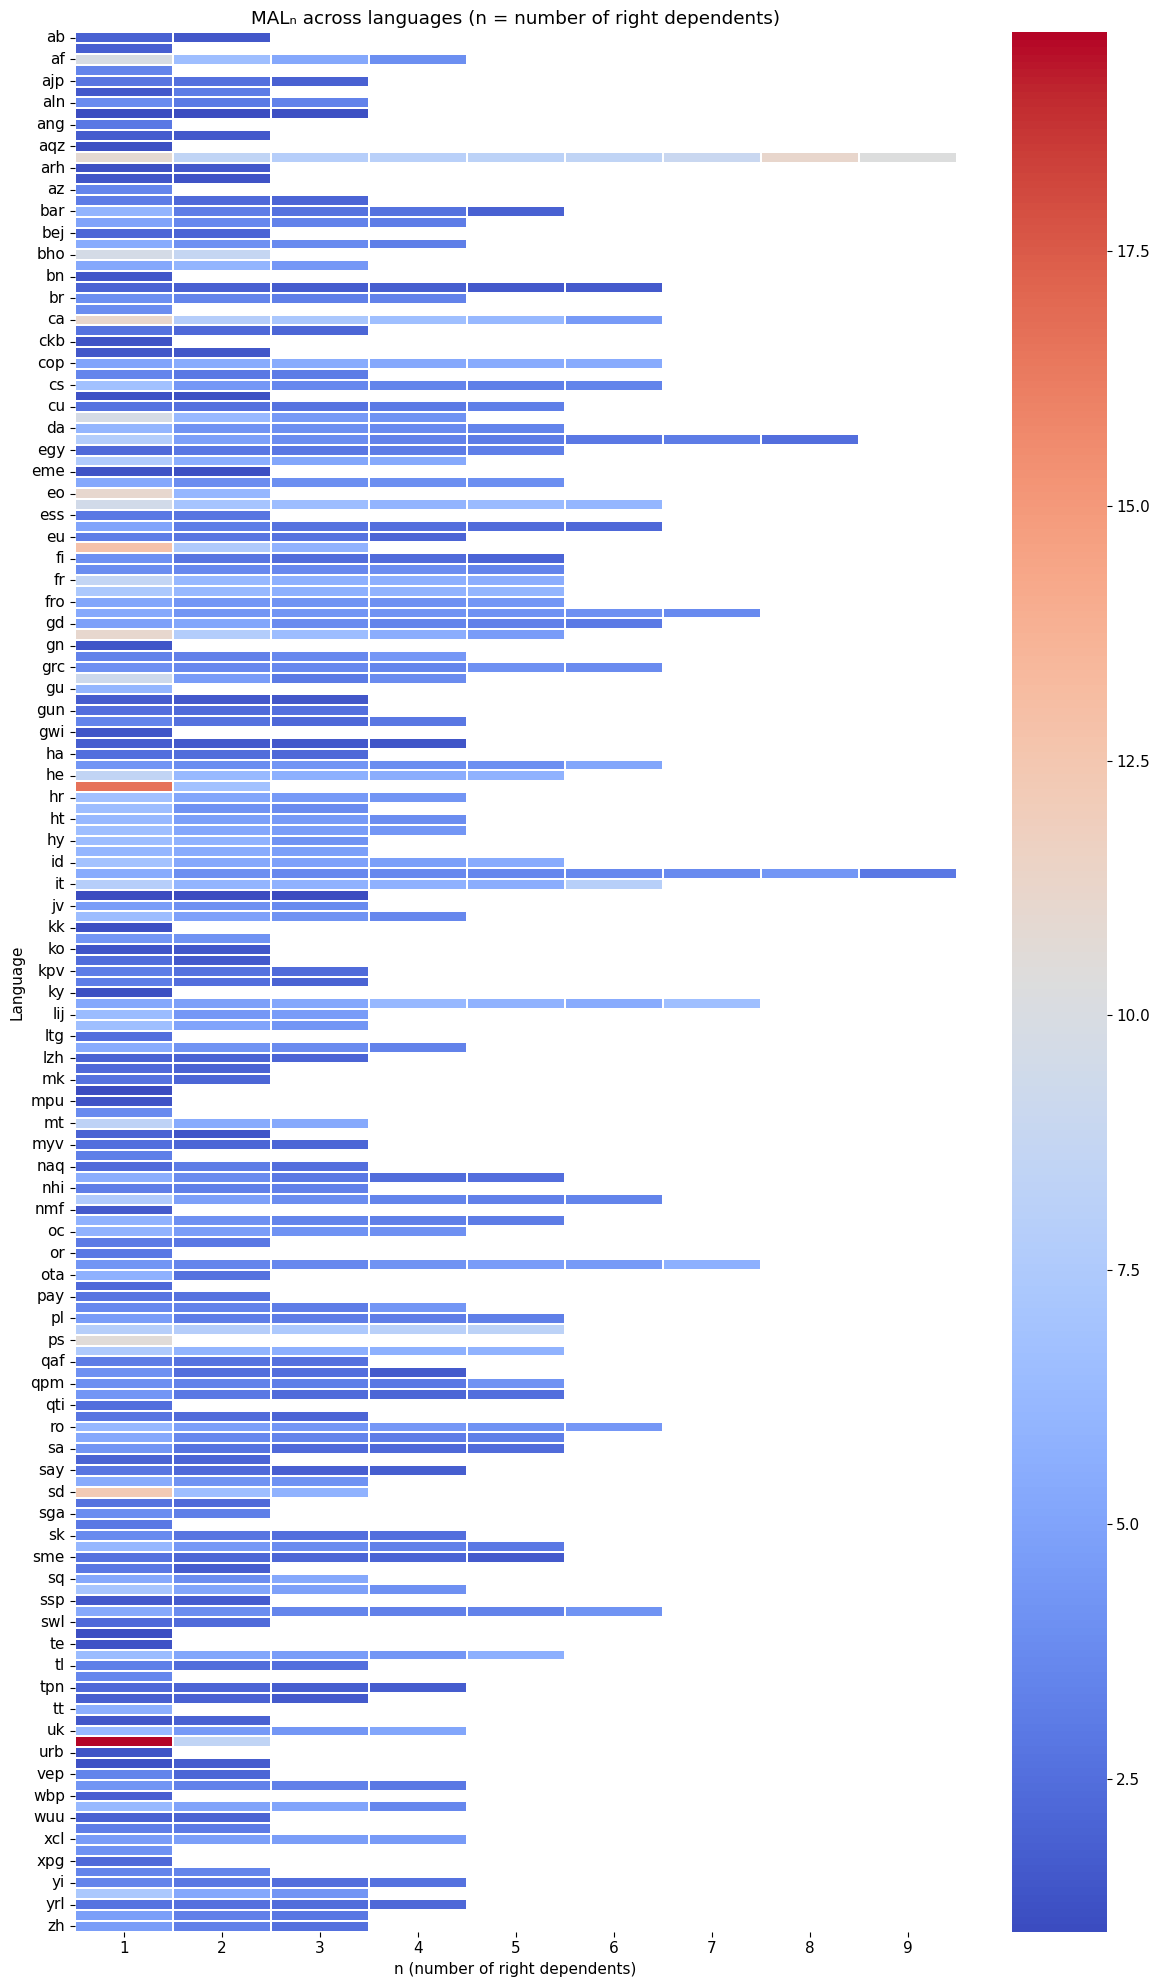

In [15]:
plotting.plot_mal_heatmap(
    lang2MAL,
    figsize=(12, 20),
    cmap="coolwarm"
)

## 7. Position Distribution Analysis

Explore the distribution of specific position types across languages.

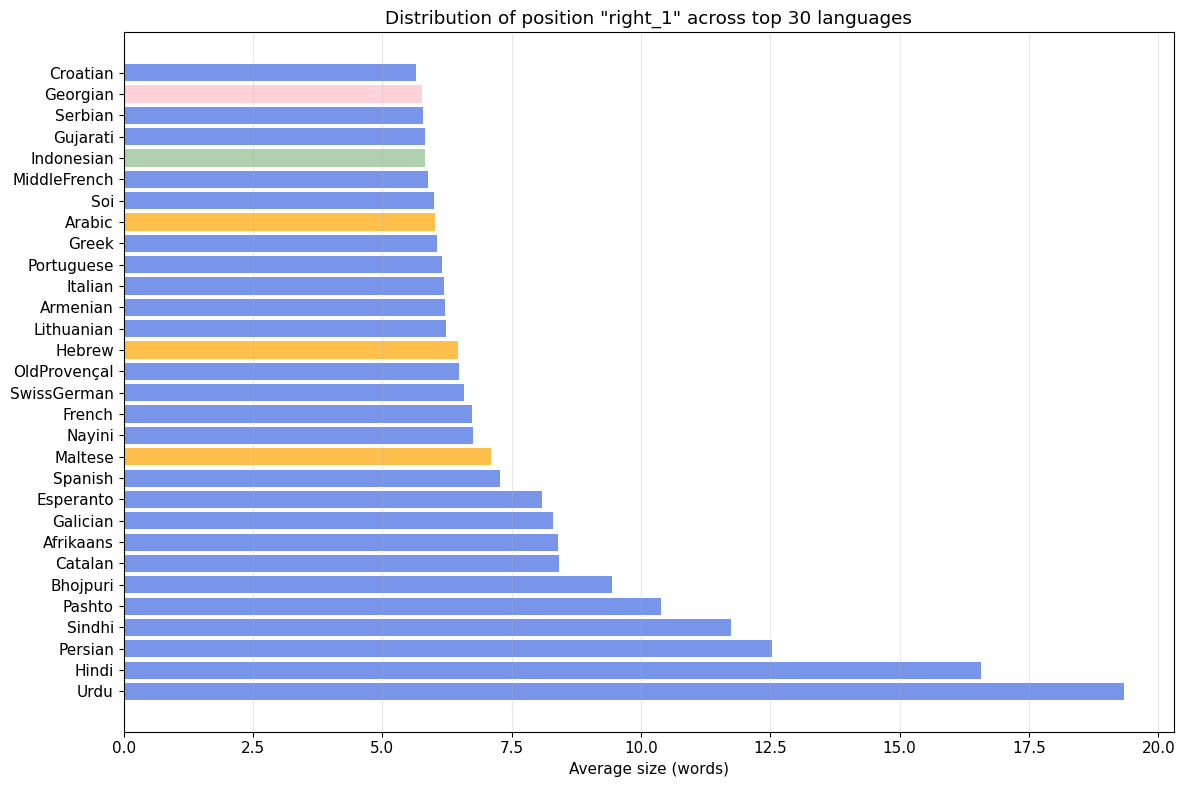

In [16]:
# Plot distribution of right_1 position
plotting.plot_position_distribution(
    all_langs_average_sizes,
    'right_1',
    langNames,
    langnameGroup,
    appearance_dict,
    top_n=30
)

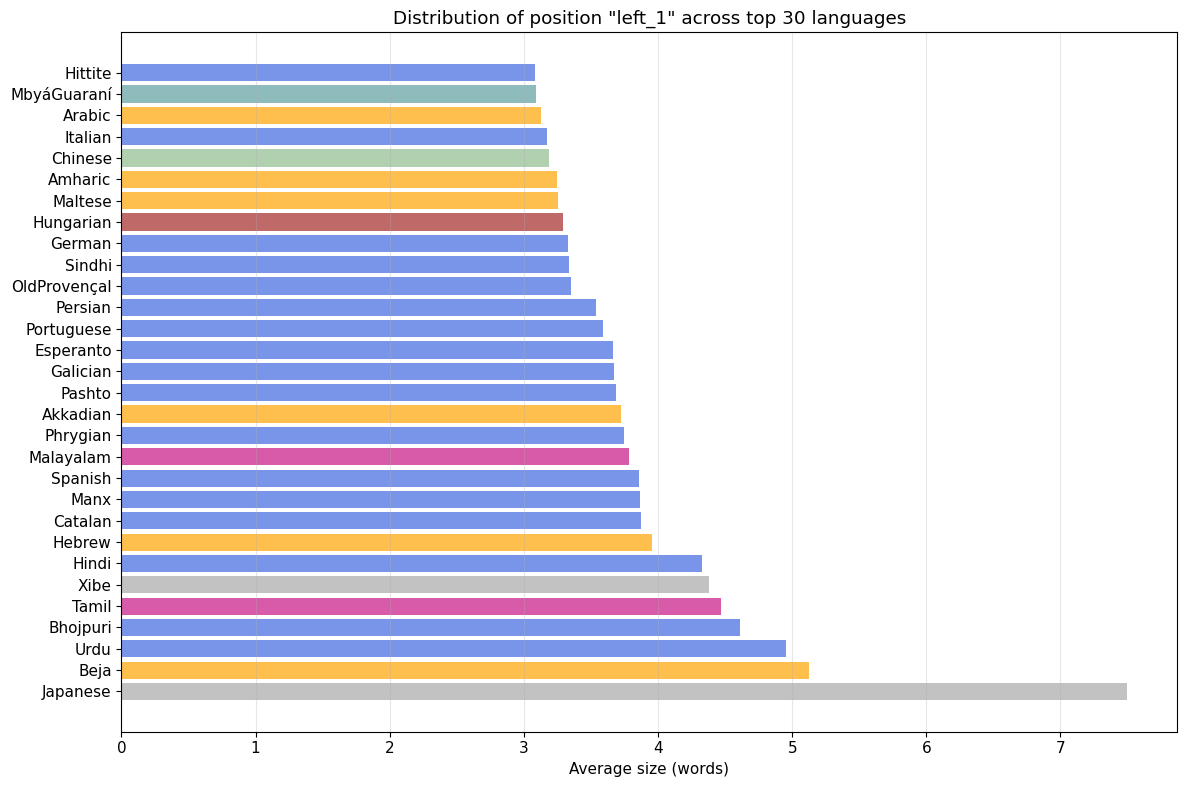

In [17]:
# Plot distribution of left_1 position
plotting.plot_position_distribution(
    all_langs_average_sizes,
    'left_1',
    langNames,
    langnameGroup,
    appearance_dict,
    top_n=30
)

## 8. Create DataFrame for 2D/3D Analysis

In [18]:
# Create DataFrame with MAL values for n=1,2,3
df_mal = []
for lang, mal_dict in lang2MAL.items():
    if 1 in mal_dict and 2 in mal_dict and 3 in mal_dict:
        lang_name = langNames.get(lang, lang)
        group = langnameGroup.get(lang_name, 'Other')
        df_mal.append({
            'language': lang_name,
            'code': lang,
            'group': group,
            'MAL1': mal_dict[1],
            'MAL2': mal_dict[2],
            'MAL3': mal_dict[3]
        })

df_mal = pd.DataFrame(df_mal)
print(f"Languages with MAL1, MAL2, MAL3: {len(df_mal)}")
df_mal.head()

Languages with MAL1, MAL2, MAL3: 108


,language,code,group,MAL1,MAL2,MAL3
0,Afrikaans,af,Indo-European,9.942490,6.609043,5.245955
1,Albanian,sq,Indo-European,5.230241,3.904580,5.293333
2,SwissGerman,gsw,Indo-European,9.280088,4.577703,3.038314
3,Amharic,am,Afroasiatic,1.039627,1.035088,1.173913
4,AncientGreek,grc,Indo-European,4.037174,3.658456,3.683673


## 9. 2D Scatter Plot: MAL1 vs MAL2

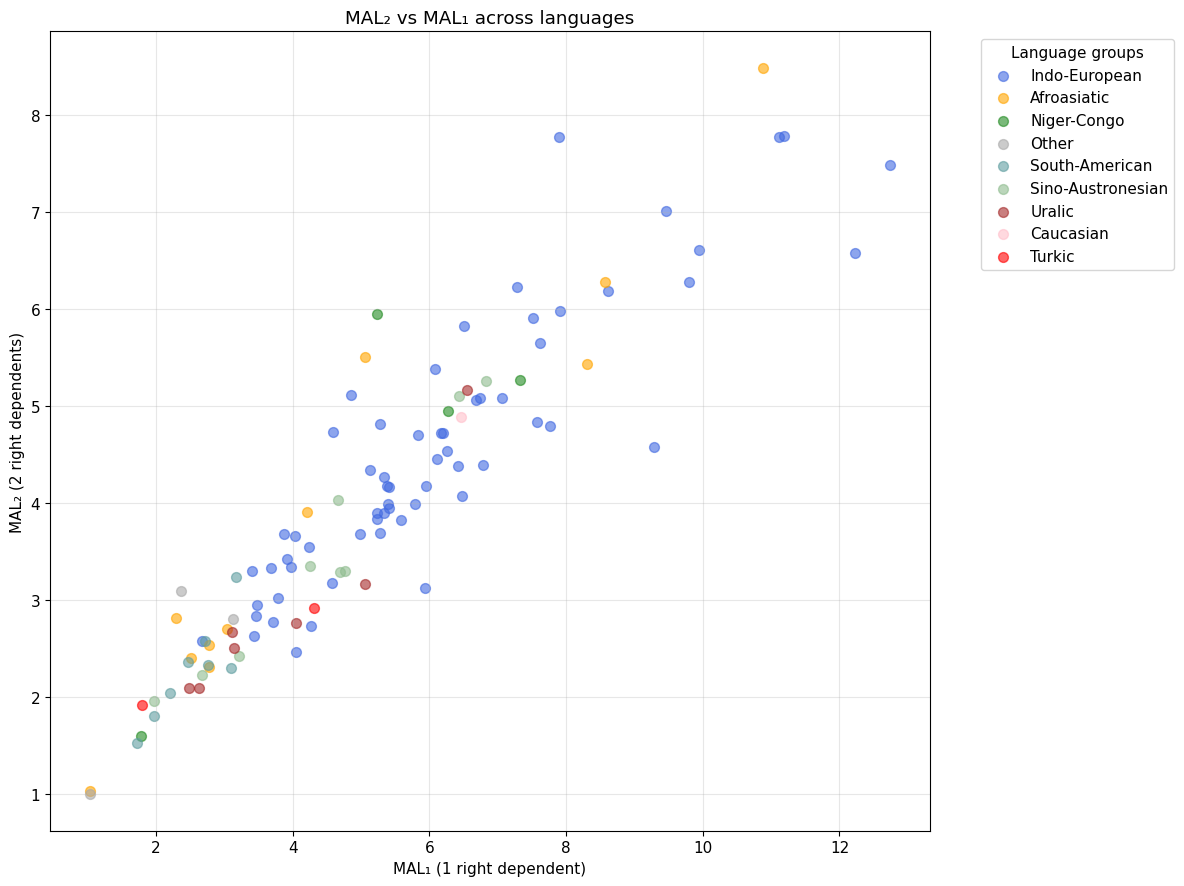

In [19]:
plotting.plot_scatter_2d(
    df_mal,
    'MAL1',
    'MAL2',
    'group',
    appearance_dict,
    title="MAL₂ vs MAL₁ across languages",
    xlabel="MAL₁ (1 right dependent)",
    ylabel="MAL₂ (2 right dependents)",
    figsize=(12, 9)
)

## 10. 3D Scatter Plot: MAL1 vs MAL2 vs MAL3

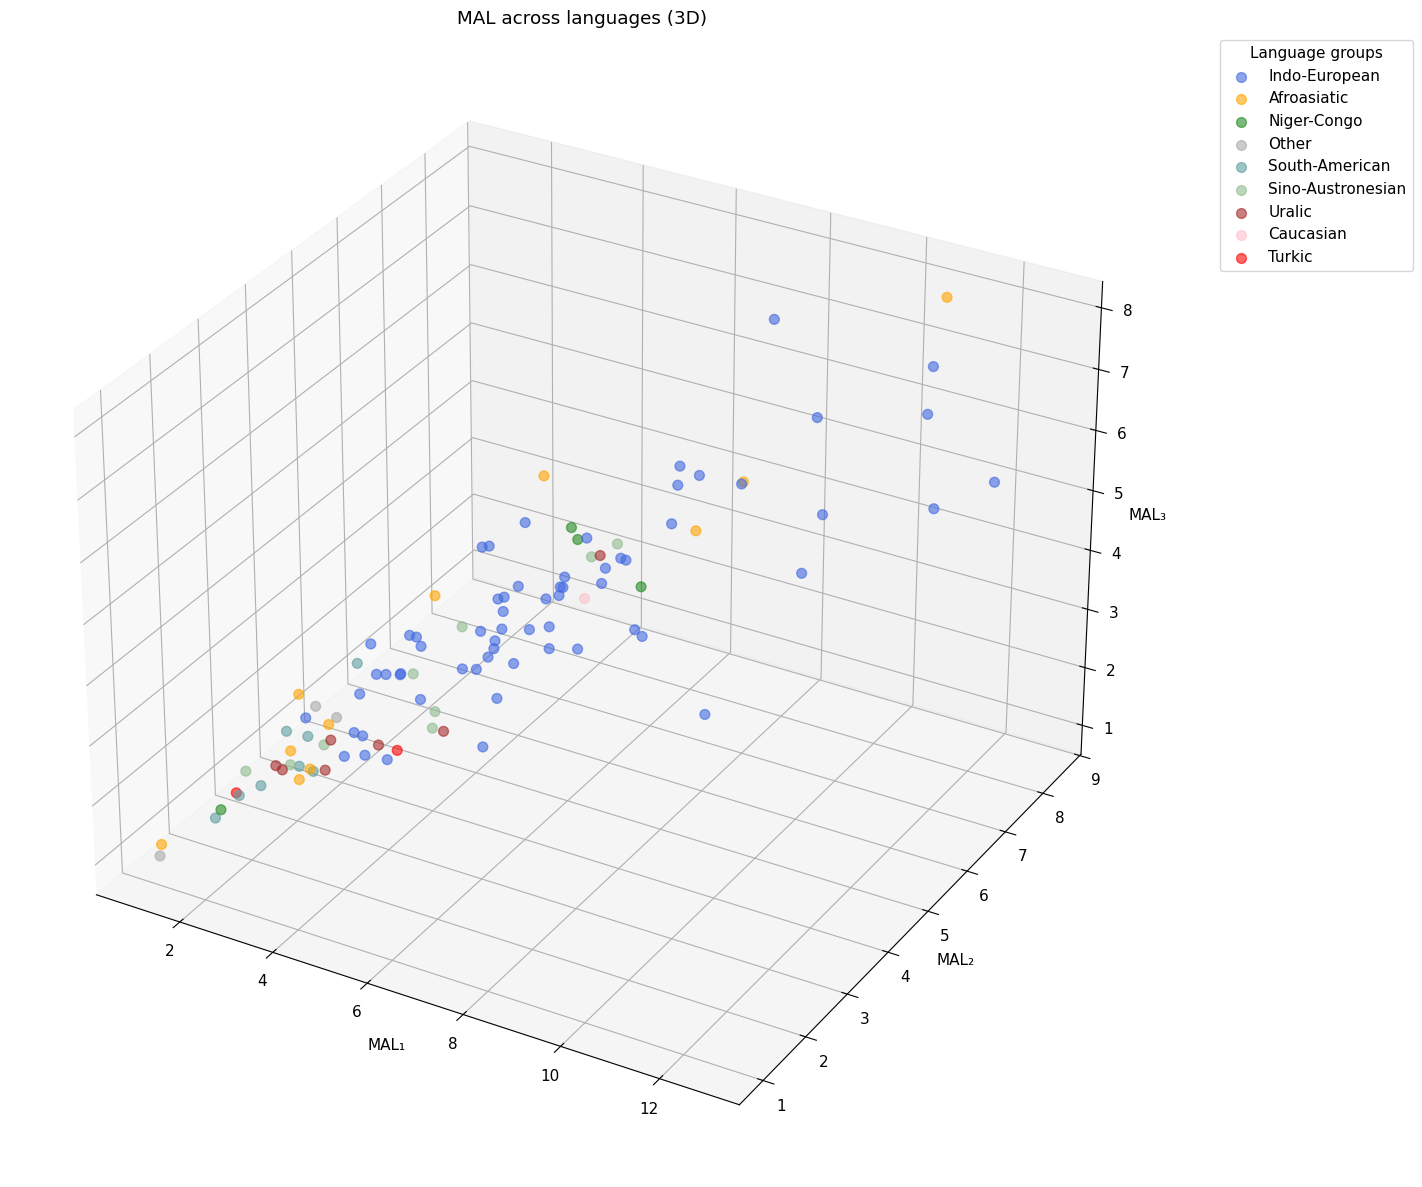

In [20]:
plotting.plot_scatter_3d(
    df_mal,
    'MAL1',
    'MAL2',
    'MAL3',
    'group',
    appearance_dict,
    title="MAL across languages (3D)",
    xlabel="MAL₁",
    ylabel="MAL₂",
    zlabel="MAL₃",
    figsize=(14, 12)
)

## 11. Group Statistics

In [21]:
# Compute group statistics
group_stats = df_mal.groupby('group')[['MAL1', 'MAL2', 'MAL3']].agg(['mean', 'std', 'count'])
print("Group statistics:")
print(group_stats)

Group statistics:
                       MAL1                      MAL2                  \
                       mean       std count      mean       std count   
group                                                                   
Afroasiatic        4.677364  3.173973    11  3.950221  2.215022    11   
Caucasian          6.464724       NaN     1  4.892638       NaN     1   
Indo-European      6.158231  2.234578    63  4.557508  1.363804    63   
Niger-Congo        5.152091  2.408449     4  4.443325  1.942033     4   
Other              2.175511  1.057923     3  2.300874  1.136216     3   
Sino-Austronesian  4.386561  1.606020     9  3.441713  1.181407     9   
South-American     2.510550  0.519193     8  2.275493  0.514622     8   
Turkic             3.047168  1.779561     2  2.417751  0.705300     2   
Uralic             3.861422  1.483258     7  2.927086  1.058869     7   

                       MAL3                  
                       mean       std count  
group        

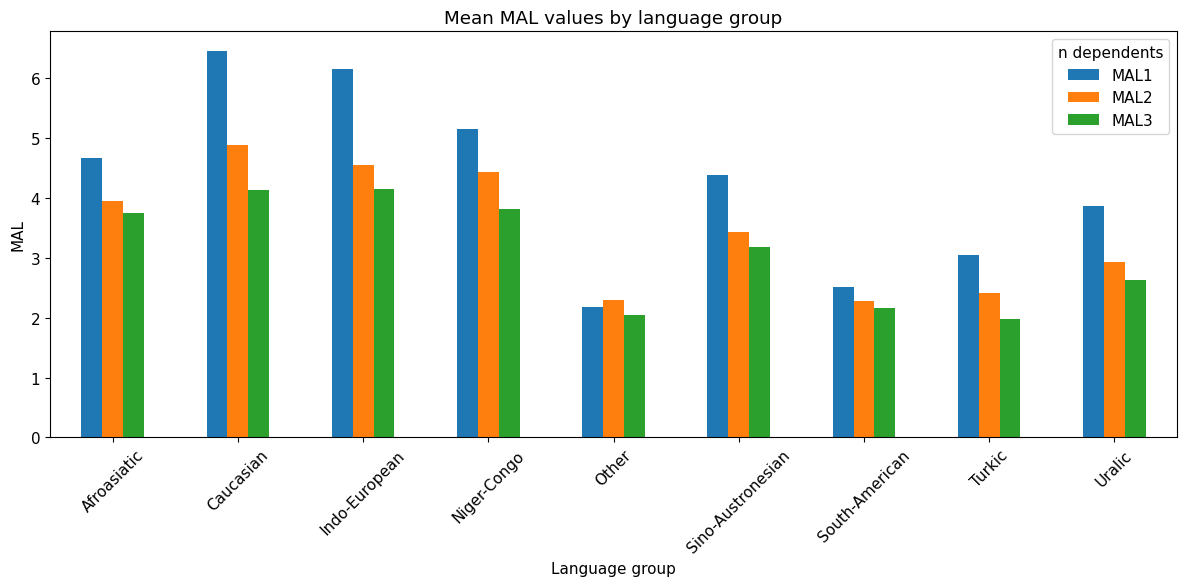

In [22]:
# Plot group means
group_means = df_mal.groupby('group')[['MAL1', 'MAL2', 'MAL3']].mean()
group_means.plot(kind='bar', figsize=(12, 6), rot=45)
plt.title("Mean MAL values by language group")
plt.xlabel("Language group")
plt.ylabel("MAL")
plt.legend(title="n dependents")
plt.tight_layout()
plt.show()

## 12. Custom Analysis

Use this section for your own exploratory analysis.

In [ ]:
# Your custom analysis here

## Summary

This notebook has:
- ✅ Loaded analysis results from notebook 02
- ✅ Plotted MAL curves for n=2, 3, 5
- ✅ Created MAL heatmap across all languages
- ✅ Analyzed position distributions (left_1, right_1)
- ✅ Created 2D scatter plot (MAL1 vs MAL2)
- ✅ Created 3D scatter plot (MAL1 vs MAL2 vs MAL3)
- ✅ Computed group-level statistics

**Key observations**:
- MAL typically increases with n (more dependents → longer dependencies)
- Clear differences between language groups
- Position distributions vary significantly across languages